In [ ]:
# from lab3
import os
cpu = input('enter CPU number (0/1)?')
str = "taskset -c "+cpu+" python3 fib.py"
print(str)
os.system(str)

In [ ]:
# use psutil
import psutil, time

# Create a function to get the CPU usage
def get_cpu_usage():
  """Returns the CPU usage as a percentage."""
  return psutil.cpu_percent()

# Create a loop to continuously monitor the CPU usage
while True:
  # Get the CPU usage
  cpu_usage = get_cpu_usage()

  # Print the CPU usage to the console
  print(f"CPU usage: {cpu_usage}%")

  # Sleep for 1 second
  time.sleep(1)

In [22]:
#Implement ELAPSED TIME
import time
start = time.time();print(start)
#<<<< tratar fibonacci con argumento de entrada que tome valores 1-30
time.sleep(1)
end = time.time();print(end)
print(end - start)

1667142589.5592985
1667142590.5779364
1.0186378955841064


In [1]:
#new /clock_example0/cycletime2.c version2, clock_example0
# https://docs.python.org/3/library/ctypes.html

%reset -f
import ctypes, time
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))
_libInC.init_cntrs(1,1)#reset=1, enable_divider=1
start = ctypes.c_uint(_libInC.gcyclec()).value
time.sleep(1)
stop = ctypes.c_uint(_libInC.gcyclec()).value
elapsed = stop-start
print("  start: "+str(start)+"\n"\
      "   stop: "+str(stop)+"\n"\
      "elapsed: "+str(elapsed))

Library version: 700
  start: 5858
   stop: 900652
elapsed: 894794


Library version: 700
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 4.100799560546875e-05
Please enter a positive integer
time spent: 3.9577484130859375e-05
Please enter a positive integer
time spent: 4.38690185546875e-05
3 Readings : [0.2823057174682617, 0.2807629108428955, 0.2877347469329834]
taskset -c 1 python3 fib.py 5
time spent: 4.38690185546875e-05
time spent: 4.291534423828125e-05
time spent: 4.649162292480469e-05
3 Readings : [0.28080177307128906, 0.28180789947509766, 0.2810330390930176]
taskset -c 1 python3 fib.py 10
time spent: 0.00033783912658691406
time spent: 0.00034356117248535156
time spent: 0.0003502368927001953
3 Readings : [0.28055715560913086, 0.2814812660217285, 0.2844858169555664]
taskset -c 1 python3 fib.py 15
time spent: 0.003372669219970703
time spent: 0.003466367721557617
time spent: 0.0033731460571289062
3 Readings : [0.28441858291625977, 0.28578996658325195, 0.2847864627838135]
taskset -c 1 python3 fib.py 20
time spent: 0.03591465

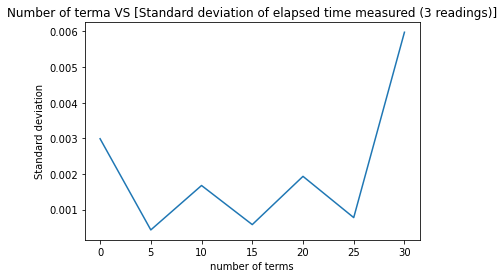

In [37]:
#@@@new /clock_example0/cycletime2.c version2, clock_example0
# https://docs.python.org/3/library/ctypes.html
# add python time and run fibonacci script, standard deviation ELAPSED TIME
%reset -f
import os, ctypes, time, math;import matplotlib.pyplot as plt 
N_TERM_Sary, avgEXEC_TIMEary, stddevEXEC_TIMEary = [], [], []
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))

# Standard deviation of list, Using sum() + list comprehension 
def Stddev(test_list):
    mean = sum(test_list) / len(test_list) 
    variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
    res = variance ** 0.5
    return res

_libInC.init_cntrs(1,1)#reset=1, enable_divider=1
for NumberOfTerms in range(0,35,5):
    N_TERM_Sary.append(NumberOfTerms)
    cmd = "taskset -c 1 python3 fib.py "+ str(NumberOfTerms);print (cmd)
    EXEC_TIMEary = []
    for ith in range(3):
        start1 = ctypes.c_uint(_libInC.gcyclec()).value
        start2 = time.time()
        os.system(cmd)
        stop1 = ctypes.c_uint(_libInC.gcyclec()).value
        stop2 = time.time()
        elapsed1 = stop1-start1
        elapsed2 = stop2-start2
        '''
        print("Cycles elapsed (cycles), getCycles():")
        print("  start1: "+str(start1)+"\n"\
              "   stop1: "+str(stop1)+"\n"\
              "elapsed1: "+str(elapsed1))
        print("Time elapsed (sec), using Python time:")
        print("  start2: "+str(start2)+"\n"\
              "   stop2: "+str(stop2)+"\n"\
              "elapsed2: "+str(elapsed2))
        '''
        EXEC_TIMEary.append(elapsed2)
    
    sdev = Stddev(EXEC_TIMEary)
    avg = sum(EXEC_TIMEary) / len(EXEC_TIMEary) 
    print("3 Readings : " + str(EXEC_TIMEary))
    stddevEXEC_TIMEary.append(sdev)
    avgEXEC_TIMEary.append(avg)
print("all nTerms: " + str(N_TERM_Sary))  
print("all    avg: " + str(avgEXEC_TIMEary))
print("all StdDev: " + str(stddevEXEC_TIMEary))

import matplotlib.pyplot as plt 
x = N_TERM_Sary
y = stddevEXEC_TIMEary
plt.title("Number of terma VS [Standard deviation of elapsed time measured (3 readings)]")
plt.xlabel("number of terms")
plt.ylabel("Standard deviation")
plt.plot(x, y)

Library version: 700
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 3.910064697265625e-05
Please enter a positive integer
time spent: 4.0531158447265625e-05
Please enter a positive integer
time spent: 3.9577484130859375e-05
3 Readings : [537585, 390594, 447519]
taskset -c 1 python3 fib.py 5
time spent: 4.3392181396484375e-05
time spent: 4.458427429199219e-05
time spent: 4.3392181396484375e-05
3 Readings : [724288, 385227, 389008]
taskset -c 1 python3 fib.py 10
time spent: 0.00033855438232421875
time spent: 0.00034427642822265625
time spent: 0.0003383159637451172
3 Readings : [387095, 387985, 833363]
taskset -c 1 python3 fib.py 15
time spent: 0.0034089088439941406
time spent: 0.003468751907348633
time spent: 0.0034089088439941406
3 Readings : [405651, 389720, 386964]
taskset -c 1 python3 fib.py 20
time spent: 0.03592491149902344
time spent: 0.0360262393951416
time spent: 0.03585457801818848
3 Readings : [384608, 812256, 430449]
taskset -c 1 python3 fib.py 25
t

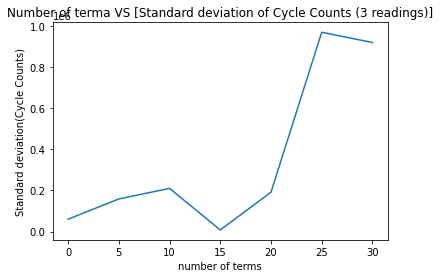

In [38]:
#@@@new /clock_example0/cycletime2.c version2, clock_example0
# https://docs.python.org/3/library/ctypes.html
# add python time and run fibonacci script, standard deviation ELAPSED cycleCounts
%reset -f
import os, ctypes, time, math;import matplotlib.pyplot as plt 
N_TERM_Sary, avgEXEC_TIMEary, stddevEXEC_TIMEary = [], [], []
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))

# Standard deviation of list, Using sum() + list comprehension 
def Stddev(test_list):
    mean = sum(test_list) / len(test_list) 
    variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
    res = variance ** 0.5
    return res

_libInC.init_cntrs(1,1)#reset=1, enable_divider=1
for NumberOfTerms in range(0,35,5):
    N_TERM_Sary.append(NumberOfTerms)
    cmd = "taskset -c 1 python3 fib.py "+ str(NumberOfTerms);print (cmd)
    EXEC_TIMEary = []
    for ith in range(3):
        start1 = ctypes.c_uint(_libInC.gcyclec()).value
        start2 = time.time()
        os.system(cmd)
        stop1 = ctypes.c_uint(_libInC.gcyclec()).value
        stop2 = time.time()
        elapsed1 = stop1-start1
        elapsed2 = stop2-start2
        EXEC_TIMEary.append(elapsed1)
    
    sdev = Stddev(EXEC_TIMEary)
    avg = sum(EXEC_TIMEary) / len(EXEC_TIMEary) 
    print("3 Readings : " + str(EXEC_TIMEary))
    stddevEXEC_TIMEary.append(sdev)
    avgEXEC_TIMEary.append(avg)
print("all nTerms: " + str(N_TERM_Sary))  
print("all    avg: " + str(avgEXEC_TIMEary))
print("all StdDev: " + str(stddevEXEC_TIMEary))

import matplotlib.pyplot as plt 
x = N_TERM_Sary
y = stddevEXEC_TIMEary
plt.title("Number of terma VS [Standard deviation of Cycle Counts (3 readings)]")
plt.xlabel("number of terms")
plt.ylabel("Standard deviation(Cycle Counts)")
plt.plot(x, y)

Library version: 700
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 3.981590270996094e-05
Please enter a positive integer
time spent: 3.9577484130859375e-05
Please enter a positive integer
time spent: 4.100799560546875e-05
3 Readings : [410606, 394479, 397248]
taskset -c 1 python3 fib.py 5
time spent: 4.315376281738281e-05
time spent: 4.363059997558594e-05
time spent: 4.506111145019531e-05
3 Readings : [405537, 873139, 386854]
taskset -c 1 python3 fib.py 10
time spent: 0.0003364086151123047
time spent: 0.0003380775451660156
time spent: 0.00034499168395996094
3 Readings : [386149, 395762, 422180]
taskset -c 1 python3 fib.py 15
time spent: 0.003447294235229492
time spent: 0.003374814987182617
time spent: 0.0034360885620117188
3 Readings : [430528, 845592, 407685]
taskset -c 1 python3 fib.py 20
time spent: 0.0359346866607666
time spent: 0.03584432601928711
time spent: 0.0359339714050293
3 Readings : [389444, 389000, 448988]
taskset -c 1 python3 fib.py 25
time sp

<ErrorbarContainer object of 3 artists>

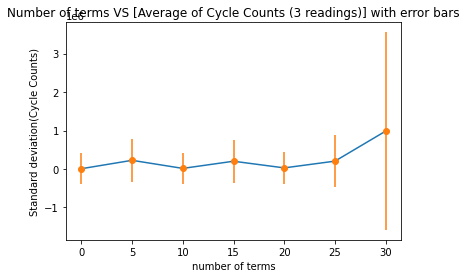

In [2]:
#@@@new /clock_example0/cycletime2.c version2, clock_example0
# https://docs.python.org/3/library/ctypes.html
# add python time and run fibonacci script, std deviation ELAPSED cycleCounts plus error bars
%reset -f
import os, ctypes, time, math;import matplotlib.pyplot as plt 
N_TERM_Sary, avgEXEC_TIMEary, stddevEXEC_TIMEary = [], [], []
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))

# Standard deviation of list, Using sum() + list comprehension 
def Stddev(test_list):
    mean = sum(test_list) / len(test_list) 
    variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
    res = variance ** 0.5
    return res

_libInC.init_cntrs(1,1)#reset=1, enable_divider=1
for NumberOfTerms in range(0,35,5):
    N_TERM_Sary.append(NumberOfTerms)
    cmd = "taskset -c 1 python3 fib.py "+ str(NumberOfTerms);print (cmd)
    EXEC_TIMEary = []
    for ith in range(3):
        start1 = ctypes.c_uint(_libInC.gcyclec()).value
        start2 = time.time()
        os.system(cmd)
        stop1 = ctypes.c_uint(_libInC.gcyclec()).value
        stop2 = time.time()
        elapsed1 = stop1-start1
        elapsed2 = stop2-start2
        EXEC_TIMEary.append(elapsed1)
    
    sdev = Stddev(EXEC_TIMEary)
    avg = sum(EXEC_TIMEary) / len(EXEC_TIMEary) 
    print("3 Readings : " + str(EXEC_TIMEary))
    stddevEXEC_TIMEary.append(sdev)
    avgEXEC_TIMEary.append(avg)
print("all nTerms: " + str(N_TERM_Sary))  
print("all    avg: " + str(avgEXEC_TIMEary))
print("all StdDev: " + str(stddevEXEC_TIMEary))

import matplotlib.pyplot as plt 
x = N_TERM_Sary
y = stddevEXEC_TIMEary
plt.title("Number of terms VS [Average of Cycle Counts (3 readings)] with error bars")
plt.xlabel("number of terms")
plt.ylabel("Standard deviation(Cycle Counts)")

y_error = avgEXEC_TIMEary
plt.plot(x, y)
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')


Library version: 700
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 3.8623809814453125e-05
taskset -c 1 python3 fib.py 5
time spent: 4.5299530029296875e-05
taskset -c 1 python3 fib.py 10
time spent: 0.000339508056640625
taskset -c 1 python3 fib.py 15
time spent: 0.003369569778442383
taskset -c 1 python3 fib.py 20
time spent: 0.035964250564575195
taskset -c 1 python3 fib.py 25
time spent: 0.39615368843078613
taskset -c 1 python3 fib.py 30
time spent: 4.441561698913574
all     nTerms: [0, 5, 10, 15, 20, 25, 30]
all   elapsed1: [0.04315480307692308, 0.2914146476923077, 0.06167966769230769, 0.03857442769230769, 0.03841540153846154, 0.08552718153846153, 0.16923483076923077]
all   elapsed2: [0.2822880744934082, 0.3119163513183594, 0.2949042320251465, 0.2841169834136963, 0.317455530166626, 0.6771078109741211, 4.721894979476929]
all Difference: [0.23913327141648513, 0.020501703626051693, 0.23322456433283878, 0.2455425557213886, 0.2790401286281644, 0.5915806294356596,

<ErrorbarContainer object of 3 artists>

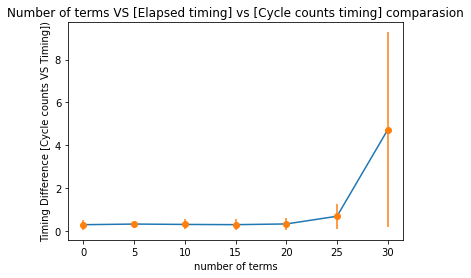

In [2]:
#@@@new /clock_example0/cycletime2.c version2, clock_example0
# https://docs.python.org/3/library/ctypes.html
# add python time and run fibonacci script, std deviation ELAPSED cycleCounts plus error bars
#@@ convert Cycle Counts to Timing (sec), for comparasion
%reset -f
import os, ctypes, time, math;import matplotlib.pyplot as plt 
N_TERM_Sary, avgEXEC_TIMEary, stddevEXEC_TIMEary = [], [], []
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))

# Standard deviation of list, Using sum() + list comprehension 
def Stddev(test_list):
    mean = sum(test_list) / len(test_list) 
    variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
    res = variance ** 0.5
    return res

def Cycles2Seconds(cycles):
    JustOneCycle = 1/650000000 #seconds
    return (cycles * JustOneCycle)

_libInC.init_cntrs(1,0)#reset=1, enable_divider=1
ELAPSED1_DIFFary = []
ELAPSED2_DIFFary = []
ELAPSED__DIFFary = []
for NumberOfTerms in range(0,35,5):
    N_TERM_Sary.append(NumberOfTerms)
    cmd = "taskset -c 1 python3 fib.py "+ str(NumberOfTerms);print (cmd)
    EXEC_TIMEary = []
    start1 = ctypes.c_uint(_libInC.gcyclec()).value
    start2 = time.time()
    os.system(cmd)
    stop1 = ctypes.c_uint(_libInC.gcyclec()).value
    stop2 = time.time()
    elapsed1 = stop1-start1
    elapsed1 = Cycles2Seconds(elapsed1)
    elapsed2 = stop2-start2
    diff = elapsed2-elapsed1
    ELAPSED1_DIFFary.append(elapsed1)
    ELAPSED2_DIFFary.append(elapsed2)
    ELAPSED__DIFFary.append(diff)

print("all     nTerms: " + str(N_TERM_Sary))  
print("all   elapsed1: " + str(ELAPSED1_DIFFary))
print("all   elapsed2: " + str(ELAPSED2_DIFFary))
print("all Difference: " + str(ELAPSED__DIFFary))

import matplotlib.pyplot as plt 
x = N_TERM_Sary
y = ELAPSED2_DIFFary
plt.title("Number of terms VS [Elapsed timing] vs [Cycle counts timing] comparasion")
plt.xlabel("number of terms")
plt.ylabel("Timing Difference [Cycle counts VS Timing])")

y_error = ELAPSED__DIFFary
plt.plot(x, y)
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')

In [5]:
def Cycles2Seconds(cycles):
    JustOneCycle = 1/650000000 #seconds
    return (cycles * JustOneCycle)

cycles = 650000000
TimeElapsedInSeconds = Cycles2Seconds(cycles)
print(TimeElapsedInSeconds)

1.0


<ErrorbarContainer object of 3 artists>

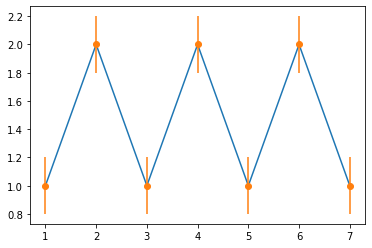

In [30]:
 # importing matplotlib
import matplotlib.pyplot as plt 
# making a simple plot
x =[1, 2, 3, 4, 5, 6, 7]
y =[1, 2, 1, 2, 1, 2, 1]
 
# creating error
y_error = 0.2
 
# plotting graph
plt.plot(x, y)
 
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')

In [ ]:
#Cycles To Seconds Formula
f = 3e9#650000000
cycles = 100

secs=(1/( *f))*cycles

print(secs)


In [ ]:
f = 650000000
JustOneCycle = 1/f #secons
print(JustOneCycle)
print("----------")
cycles = 3000000000
TimeElapsedInSeconds = cycles * JustOneCycle
print(TimeElapsedInSeconds)

In [ ]:
# Part A3.2: Comparing and Gathering Data, ERROR BAR (running fibonacci sequence) 
%reset -f
CPU, TERMSary, ELAPSEDary, ELAPSEDCYCLESary = "1", [], [], []

import os, ctypes, time, math;import matplotlib.pyplot as plt 
f = 650000
JustOneCycle = 1/f #secons

def Average(lst): 
    return sum(lst) / len(lst) 

_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))
_libInC.init_cntrs(1,1)
for NumberOfTerms in range(0,35,5):
    cmd = "taskset -c "+CPU+" python3 fib.py "+ str(NumberOfTerms);print (cmd)
    start = time.time()
    #_libInC.init_cntrs(1,1)
    StartCycles = ctypes.c_uint(_libInC.gcyclec()).value 
    os.system(cmd)
    lst = []
    #for n in range(4):
    #    cycles = ctypes.c_uint(_libInC.gcyclec()).value        
    #    lst.append(cycles)
    #ave = Average(lst)
    StopCycles = ctypes.c_uint(_libInC.gcyclec()).value 
    ElapsedTimeCycles = StopCycles - StartCycles
    TimeElapsedInSeconds = ElapsedTimeCycles * JustOneCycle
    #TimeElapsedInSeconds = round(TimeElapsedInSeconds, 9)
    end = time.time();elapsed = end - start;elapsed = round(elapsed, 9)
    print(cmd+"-> NumberOfTerms: "+ str(NumberOfTerms)+ ":\nElapsed time = " +str(elapsed)\
          +", Elapsed Seconds by get cycles = "+str(TimeElapsedInSeconds))
    TERMSary.append(NumberOfTerms);ELAPSEDary.append(elapsed);ELAPSEDCYCLESary.append(TimeElapsedInSeconds)  
    lst = []

x = TERMSary
dataset_1 = ELAPSEDary
dataset_2 = ELAPSEDCYCLESary
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('X-axis, Number of terms') 
ax1.set_ylabel('Y1-axis, Elapsed time in seconds', color = color) 
ax1.plot(x, dataset_1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
ax2 = ax1.twinx() # Adding Twin Axes to plot using dataset_2
color = 'tab:green'
ax2.set_ylabel('Y2-axis, Elapsed time by get CPU cycles(Sec)', color = color) 
ax2.plot(x, dataset_2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
plt.title('[Elapsed time (Sec)] vs [Elapsed time by get CPU cycles(Sec)]', fontweight ="bold") 
#plt.yscale("log")
plt.show()

Library version: 700
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 3.8623809814453125e-05
taskset -c 1 python3 fib.py 0-> NumberOfTerms: 0 -> Elapsed time = 0.2854857, cycles = 182654923.25
taskset -c 1 python3 fib.py 5
time spent: 4.38690185546875e-05
taskset -c 1 python3 fib.py 5-> NumberOfTerms: 5 -> Elapsed time = 0.2801116, cycles = 179635468.25
taskset -c 1 python3 fib.py 10
time spent: 0.00034427642822265625
taskset -c 1 python3 fib.py 10-> NumberOfTerms: 10 -> Elapsed time = 0.2799449, cycles = 179563247.25
taskset -c 1 python3 fib.py 15
time spent: 0.0034863948822021484
taskset -c 1 python3 fib.py 15-> NumberOfTerms: 15 -> Elapsed time = 0.283051, cycles = 181602819.0
taskset -c 1 python3 fib.py 20
time spent: 0.03589892387390137
taskset -c 1 python3 fib.py 20-> NumberOfTerms: 20 -> Elapsed time = 0.3169413, cycles = 203540381.0
taskset -c 1 python3 fib.py 25
time spent: 0.39631080627441406
taskset -c 1 python3 fib.py 25-> NumberOfTerms: 25 -> Elaps

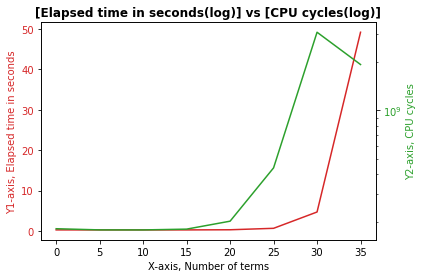

In [3]:
# Part A3.2: Comparing and Gathering Data, (running fibonacci sequence) 
%reset -f
CPU, TERMSary, ELAPSEDary, CYCLESary = "1", [], [], []

import os, ctypes, time, math;import matplotlib.pyplot as plt 

def Average(lst): 
    return sum(lst) / len(lst) 

_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))
for NumberOfTerms in range(0,40,5):
    cmd = "taskset -c "+CPU+" python3 fib.py "+ str(NumberOfTerms);print (cmd)
    start = time.time()
    _libInC.init_cntrs(1,0)
    os.system(cmd)
    lst = []
    for n in range(4):
        cycles = ctypes.c_uint(_libInC.gcyclec()).value        
        lst.append(cycles)
    ave = Average(lst) 
    end = time.time();elapsed = end - start;elapsed = round(elapsed, 7)
    print(cmd+"-> NumberOfTerms: "+ str(NumberOfTerms)+ " -> Elapsed time = " +str(elapsed)\
          +", cycles = "+str(ave))
    TERMSary.append(NumberOfTerms);ELAPSEDary.append(elapsed);CYCLESary.append(ave)  
    lst = []

x = TERMSary
dataset_1 = ELAPSEDary
dataset_2 = CYCLESary
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('X-axis, Number of terms') 
ax1.set_ylabel('Y1-axis, Elapsed time in seconds', color = color) 
ax1.plot(x, dataset_1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
ax2 = ax1.twinx() # Adding Twin Axes to plot using dataset_2
color = 'tab:green'
ax2.set_ylabel('Y2-axis, CPU cycles', color = color) 
ax2.plot(x, dataset_2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
plt.title('[Elapsed time in seconds(log)] vs [CPU cycles(log)]', fontweight ="bold") 
plt.yscale("log")
plt.show()